In [127]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Download latest version
path = kagglehub.dataset_download("manishkc06/engineering-graduate-salary-prediction")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Engineering_graduate_salary.csv")

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\manishkc06\engineering-graduate-salary-prediction\versions\1


In [128]:
df['YearOfBirth'] = pd.to_datetime(df['DOB']).dt.year
df = df.drop(columns=['DOB'])
df=df[df['Degree'] == 'B.Tech/B.E.']
df=df[df['10board'] == 'cbse']
df=df[df['12board'] == 'cbse']



In [129]:
max_year = df['YearOfBirth'].max()
min_year = df['YearOfBirth'].min()
median_year = df['YearOfBirth'].sort_values().median()

print("Max Year of Birth:", max_year)
print("Min Year of Birth:", min_year)
print("Median Year of Birth:", median_year)

# Drop columns if they exist
columns_to_drop = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','English', 'Logical', 'Quant', 'CollegeCityID', 'CollegeCityTier', 'CollegeID', 'CollegeTier','ID','CollegeState','10board','12board','12graduation', 'Domain','ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


Max Year of Birth: 1994
Min Year of Birth: 1986
Median Year of Birth: 1991.0


In [130]:
df

,Gender,10percentage,12percentage,Degree,Specialization,collegeGPA,GraduationYear,Salary,YearOfBirth
0,f,87.8,84.0,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,445000,1990
1,m,57.0,64.5,B.Tech/B.E.,computer science & engineering,65.00,2014,110000,1990
3,m,84.3,86.0,B.Tech/B.E.,computer science & engineering,80.40,2013,420000,1991
4,f,82.0,75.0,B.Tech/B.E.,biotechnology,64.30,2012,200000,1990
14,m,86.4,86.2,B.Tech/B.E.,electronics and communication engineering,81.40,2014,325000,1991
...,...,...,...,...,...,...,...,...,...
2968,m,73.8,60.2,B.Tech/B.E.,computer science & engineering,58.00,2014,120000,1992
2971,m,88.8,82.0,B.Tech/B.E.,electronics and communication engineering,71.92,2014,320000,1992
2973,m,85.0,82.0,B.Tech/B.E.,computer science & engineering,81.00,2014,440000,1991
2978,m,94.8,81.2,B.Tech/B.E.,other,90.32,2013,600000,1991


In [131]:
# Extract the salary column
salary_column = 'Salary'

# Check if salary_column exists in the dataframe
if salary_column in df.columns:
    one_hot_encoded = pd.get_dummies(df[salary_column])
    
    # Create a reverse mapping from one-hot encoded columns to original values
    reverse_mapping = {index: col for index, col in enumerate(one_hot_encoded.columns)}

    def get_original_value(one_hot_encoded_value):
        index = one_hot_encoded_value.argmax()
        return reverse_mapping[index]
    
    print(get_original_value(one_hot_encoded.iloc[10]))
    print("Original values of the one-hot encoded column:")
    for i in range(len(one_hot_encoded)):
        print(get_original_value(one_hot_encoded.iloc[i]))
        print(one_hot_encoded.iloc[i])


180000
Original values of the one-hot encoded column:
445000
60000      False
65000      False
80000      False
85000      False
90000      False
           ...  
1100000    False
1110000    False
1500000    False
1800000    False
2000000    False
Name: 0, Length: 123, dtype: bool
110000
60000      False
65000      False
80000      False
85000      False
90000      False
           ...  
1100000    False
1110000    False
1500000    False
1800000    False
2000000    False
Name: 1, Length: 123, dtype: bool
420000
60000      False
65000      False
80000      False
85000      False
90000      False
           ...  
1100000    False
1110000    False
1500000    False
1800000    False
2000000    False
Name: 3, Length: 123, dtype: bool
200000
60000      False
65000      False
80000      False
85000      False
90000      False
           ...  
1100000    False
1110000    False
1500000    False
1800000    False
2000000    False
Name: 4, Length: 123, dtype: bool
325000
60000      False
65000     

In [132]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
LabelEncoder.fit(['M', 'F'])
df['Gender'] = LabelEncoder.fit_transform(df['Gender'])
#df = pd.get_dummies(df, columns=[col for col in df.columns if col not in ['Gender']], drop_first=True)

In [133]:
df

,Gender,10percentage,12percentage,Degree,Specialization,collegeGPA,GraduationYear,Salary,YearOfBirth
0,0,87.8,84.0,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,445000,1990
1,1,57.0,64.5,B.Tech/B.E.,computer science & engineering,65.00,2014,110000,1990
3,1,84.3,86.0,B.Tech/B.E.,computer science & engineering,80.40,2013,420000,1991
4,0,82.0,75.0,B.Tech/B.E.,biotechnology,64.30,2012,200000,1990
14,1,86.4,86.2,B.Tech/B.E.,electronics and communication engineering,81.40,2014,325000,1991
...,...,...,...,...,...,...,...,...,...
2968,1,73.8,60.2,B.Tech/B.E.,computer science & engineering,58.00,2014,120000,1992
2971,1,88.8,82.0,B.Tech/B.E.,electronics and communication engineering,71.92,2014,320000,1992
2973,1,85.0,82.0,B.Tech/B.E.,computer science & engineering,81.00,2014,440000,1991
2978,1,94.8,81.2,B.Tech/B.E.,other,90.32,2013,600000,1991


In [135]:
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=[col for col in df.columns if 'Salary' in col])
y = df[[col for col in df.columns if 'Salary' in col]].values.ravel()

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ValueError: could not convert string to float: 'B.Tech/B.E.'

In [103]:
import numpy as np
from scipy import stats

# Select only numeric columns for z-score calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set a threshold for z-scores
threshold = 3

# Filter out rows with z-scores above the threshold
df = df[(z_scores < threshold).all(axis=1)]

print(f"Original dataframe shape: {df.shape}")
#print(f"Filtered dataframe shape: {df_filtered.shape}")

Original dataframe shape: (880, 944)


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Ensure x and y have the same number of samples
x = x.iloc[:len(y)]

# Ensure y has the same number of samples as x
y = y[:len(x)]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
svm_model = SVC(C=1.0, kernel='rbf')
svm_model.fit(X_train, y_train)
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")

Support Vector Machine: 0.056179775280898875


In [105]:
df

,Gender,Salary,10percentage_50.0,10percentage_52.0,10percentage_52.09,10percentage_53.4,10percentage_53.8,10percentage_54.0,10percentage_54.4,10percentage_56.0,...,GraduationYear_2016,GraduationYear_2017,YearOfBirth_1987,YearOfBirth_1988,YearOfBirth_1989,YearOfBirth_1990,YearOfBirth_1991,YearOfBirth_1992,YearOfBirth_1993,YearOfBirth_1994
0,0,445000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,110000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,420000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,200000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14,1,325000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,120000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2971,1,320000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2973,1,440000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2978,1,600000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<Axes: >

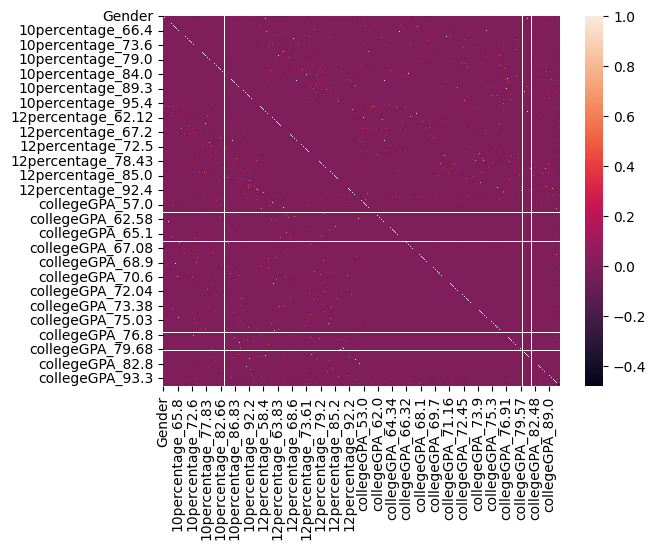

In [106]:
corr =df.corr()

# Plot the heatmap
sns.heatmap(corr)

In [ ]:
# Define a function to take user input and make a prediction
def predict_salary():
    # Take user input
    tenth_percentage = float(input("Enter your 10th percentage: "))
    twelfth_percentage = float(input("Enter your 12th percentage: "))
    college_cgpa = float(input("Enter your college CGPA: "))
    specialization = input("Enter your specialization: ")
    graduation = int(input("Enter your graduation year: "))
    year_of_birth = int(input("Enter your year of birth: "))
    gender = input("Enter your gender (M/F): ")
  #f	87.8	84.0	B.Tech/B.E.	instrumentation and control engineering	73.82	2013	445000	1990
    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        '10percentage': [tenth_percentage],
        '12percentage': [twelfth_percentage],
        'collegeGPA': [college_cgpa],
        'Specialization': [specialization],
        'Gender': [gender],
        'GraduationYear': [graduation],
        'YearOfBirth': [year_of_birth]
    })

    # Encode the gender column
    LabelEncoder.fit(['M', 'F']) # Assuming only 'M' and 'F' are valid genders 
    user_data['Gender'] = LabelEncoder.transform(user_data['Gender'].str.upper())


    # One-hot encode the specialization column
    user_data = pd.get_dummies(user_data, drop_first=True)

    # Ensure all required columns are present
    missing_cols = set(x.columns) - set(user_data.columns)
    for col in missing_cols:
        user_data[col] = 0

    # Reorder columns to match the training data
    user_data = user_data[x.columns]

    # Scale the user data
    user_data = scaler.transform(user_data)

    # Make a prediction
    prediction = svm_model.predict(user_data)
    # Print the prediction
    print(f"Predicted Salary: {prediction}")
    global prediction_result
    prediction_result = prediction

# Call the function to make a prediction
predict_salary()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data[col] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data[col] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Predicted Salary: [325000]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data[col] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data[col] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3454081690.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [109]:

print(f"Predicted Salary: {prediction_result}")

Predicted Salary: [325000]
